In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models import LGBMHierarchModel
from preprocess import data_pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
train, test = data_pipeline(dir_path="./input/jpx-tokyo-stock-exchange-prediction")

In [4]:
seed = 69
model = LGBMHierarchModel(seed=seed)

In [5]:
model.train(train=train, use_params=True)

/Users/ironmonkeyapps/miniconda3/envs/jpx/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: leaves
[LightGBM] [Warning] Unknown parameter: num


In [ ]:
res = model.predict(test, {"rmse":(mean_squared_error, {"squared":False})})
res

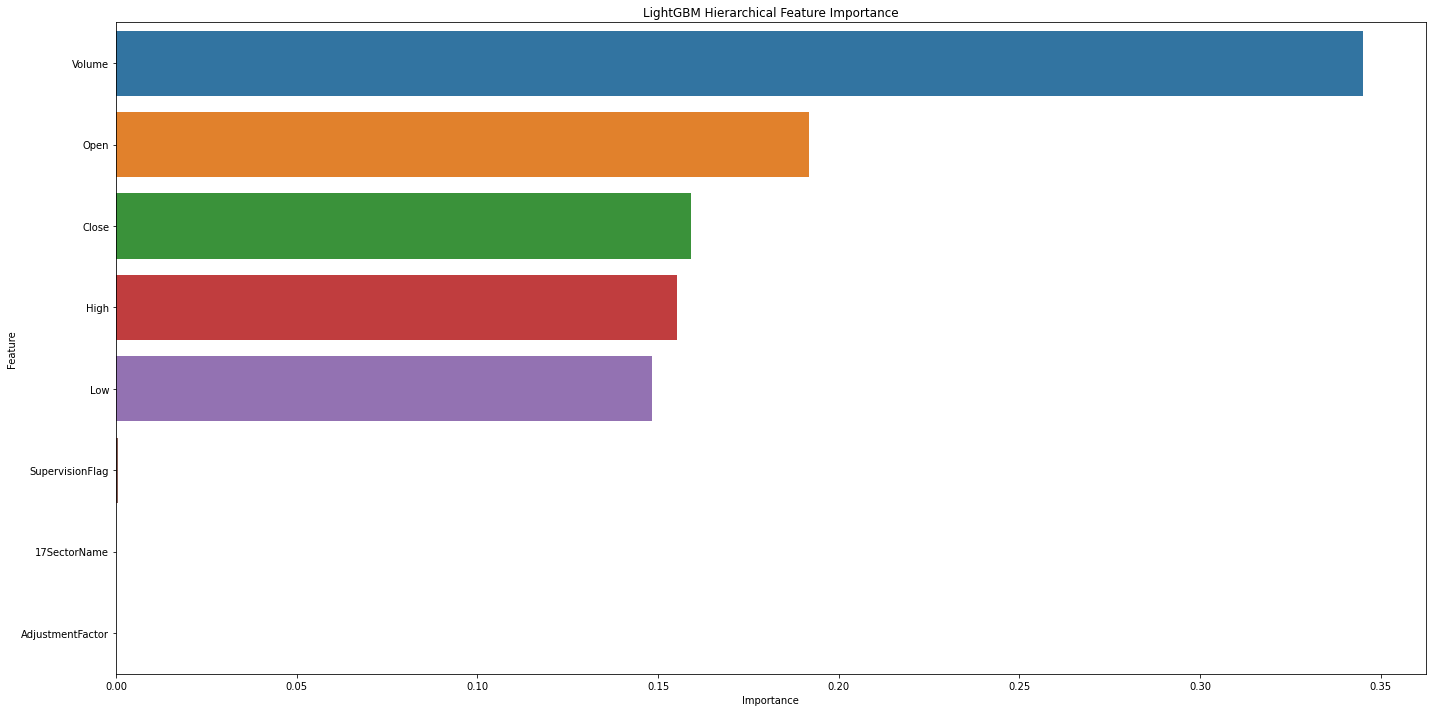

In [15]:
import numpy as np

importance = np.zeros(train.shape[1]-3)
for _, m in model.models.items():
    importance += np.array(m.feature_importances_)

importance /= len(model.models)
importance /= sum(importance)

feature_imp = pd.DataFrame(sorted(zip(importance, train.drop(["Target", "Date", "SecuritiesCode", "33SectorName"], axis=1).columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
#ax.set(xlim=(0, 7000))
ax.set(xlabel='Importance')

plt.title('LightGBM Hierarchical Feature Importance')
plt.tight_layout()
plt.show()

Air Transportation


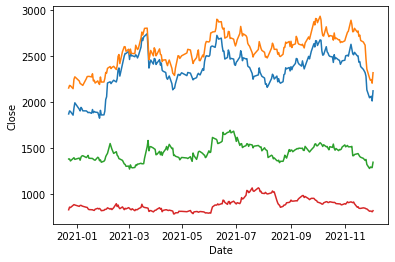

Banks


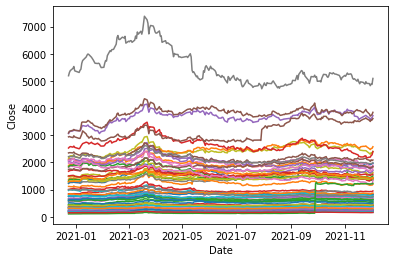

Chemicals


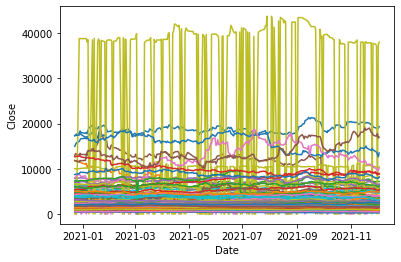

Construction


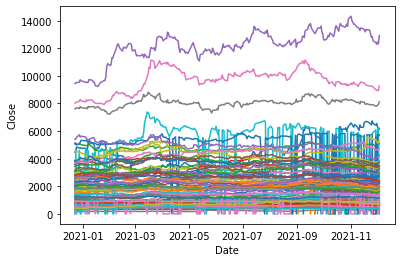

Electric Appliances


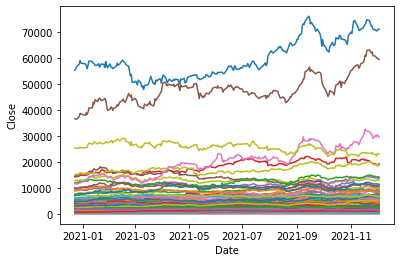

Electric Power and Gas


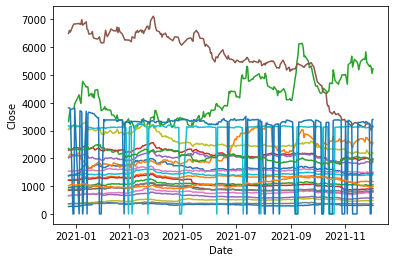

Fishery, Agriculture and Forestry


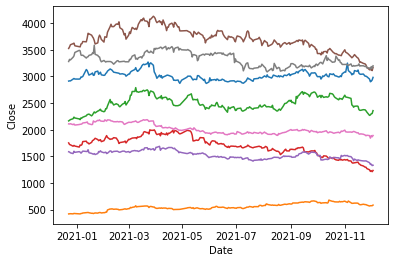

Foods


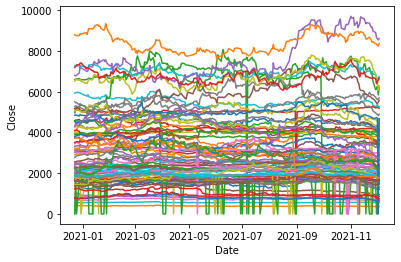

Glass and Ceramics Products


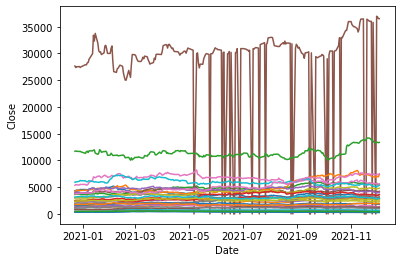

Information & Communication


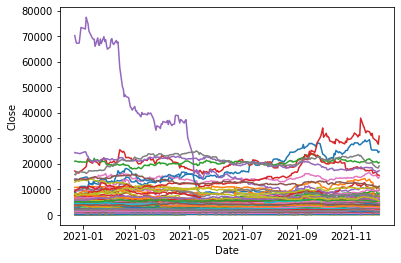

Insurance


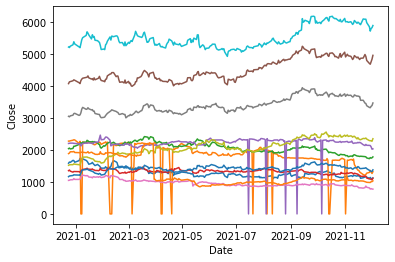

Iron and Steel


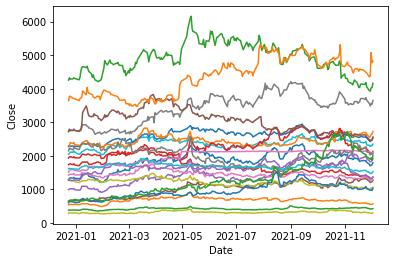

Land Transportation


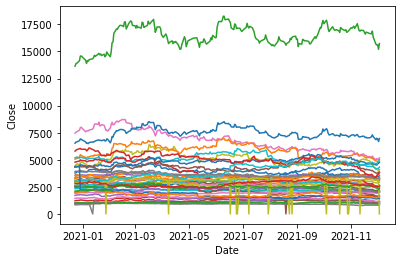

Machinery


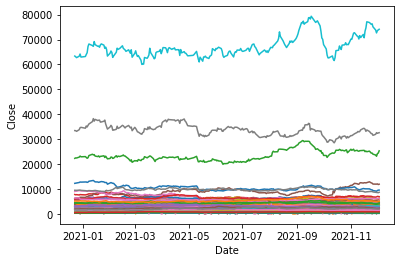

Marine Transportation


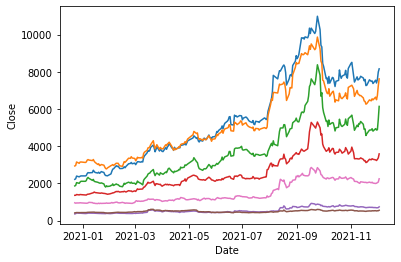

Metal Products


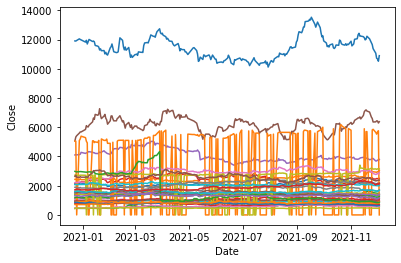

Mining


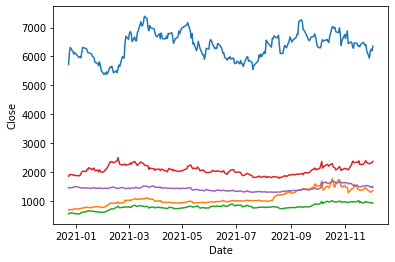

Nonferrous Metals


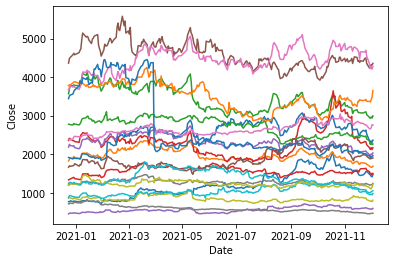

Oil and Coal Products


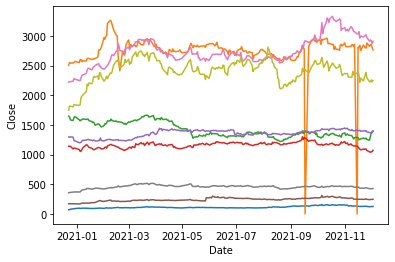

Other Financing Business


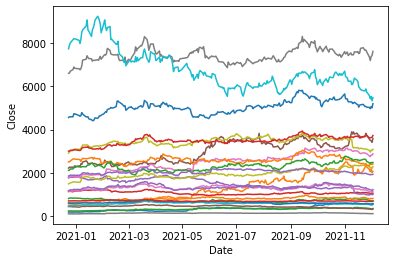

Other Products


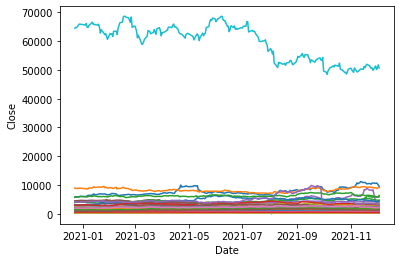

Pharmaceutical


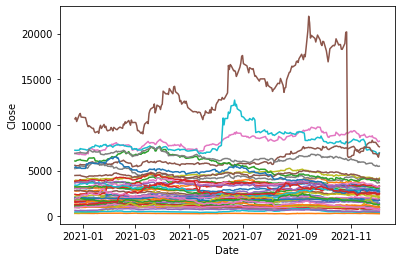

Precision Instruments


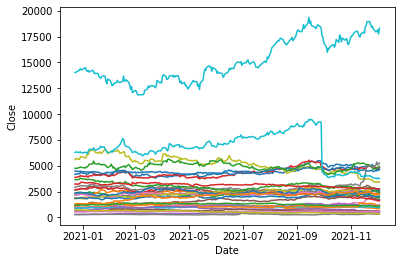

Pulp and Paper


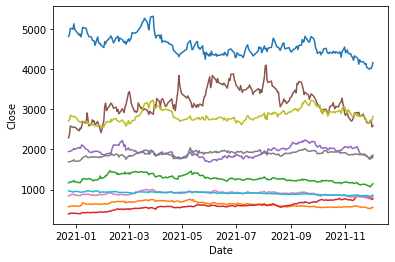

Real Estate


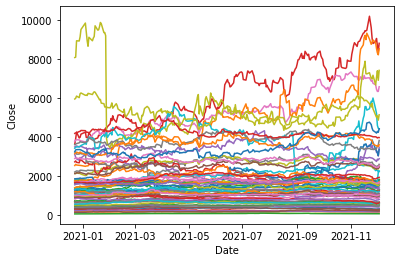

Retail Trade


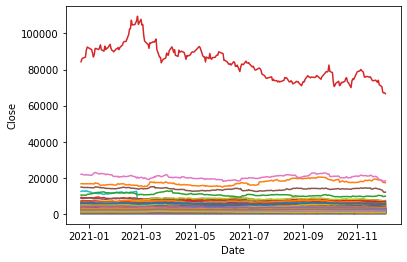

Rubber Products


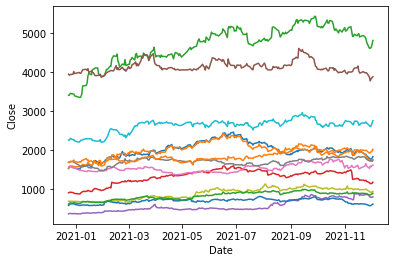

Securities and Commodities Futures


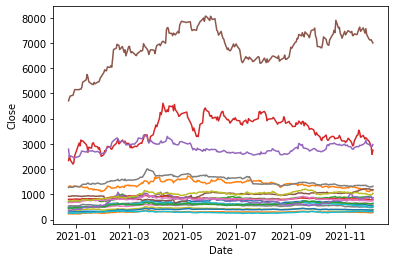

Services


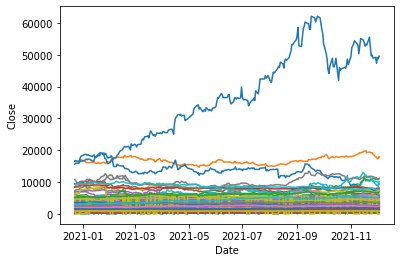

Textiles and Apparels


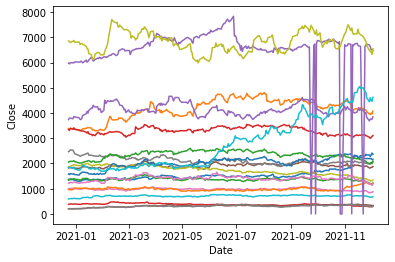

Transportation Equipment


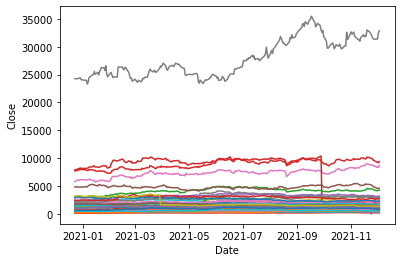

Warehousing and Harbor Transportation Service


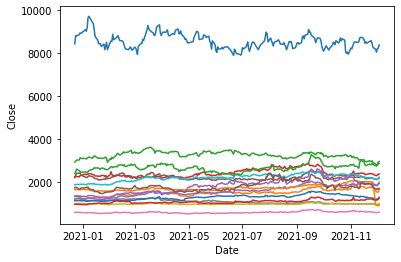

Wholesale Trade


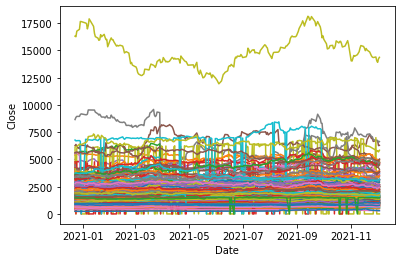

In [19]:
# print random stocks from same category
for name, group in train.groupby("33SectorName"):
    print(name)
    for n, stock in group.groupby("SecuritiesCode"):
        stock.sort_values("Date", inplace=True)
        sns.lineplot(x="Date", y="Close", data=stock)
    plt.show()
